In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
housing = fetch_california_housing()

X, y = housing.data, housing.target
feature_names = housing.feature_names

print("Features: ", feature_names)
print("X size: ", X.shape)
print("y size: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
X size:  (20640, 8)
y size:  (20640,)


In [12]:
model_full = DecisionTreeRegressor(criterion='squared_error', random_state=42)

model_full.fit(X_train, y_train)

y_pred_train_full = model_full.predict(X_train)
y_pred_test_full = model_full.predict(X_test)

print("\n--- Full Model (Overfit) ---")
print(f"R2 (Train): {r2_score(y_train, y_pred_train_full):.4f}")
print(f"R2 (Test):  {r2_score(y_test, y_pred_test_full):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_test_full):.4f}")


--- Full Model (Overfit) ---
R2 (Train): 1.0000
R2 (Test):  0.6187
MSE (Test): 0.4997


In [18]:
model_pruned = DecisionTreeRegressor(max_depth=4, random_state=42)

model_pruned.fit(X_train, y_train)

y_pred_train_pruned = model_pruned.predict(X_train)
y_pred_test_pruned = model_pruned.predict(X_test)

print("\n--- Mô hình đã Cắt tỉa (Pruned, max_depth=5) ---")
print(f"R2 (Train): {r2_score(y_train, y_pred_train_pruned):.4f}")
print(f"R2 (Test):  {r2_score(y_test, y_pred_test_pruned):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test, y_pred_test_pruned):.4f}")


--- Mô hình đã Cắt tỉa (Pruned, max_depth=5) ---
R2 (Train): 0.5887
R2 (Test):  0.5540
MSE (Test): 0.5844



Drawing decision tree (max_depth=5)...


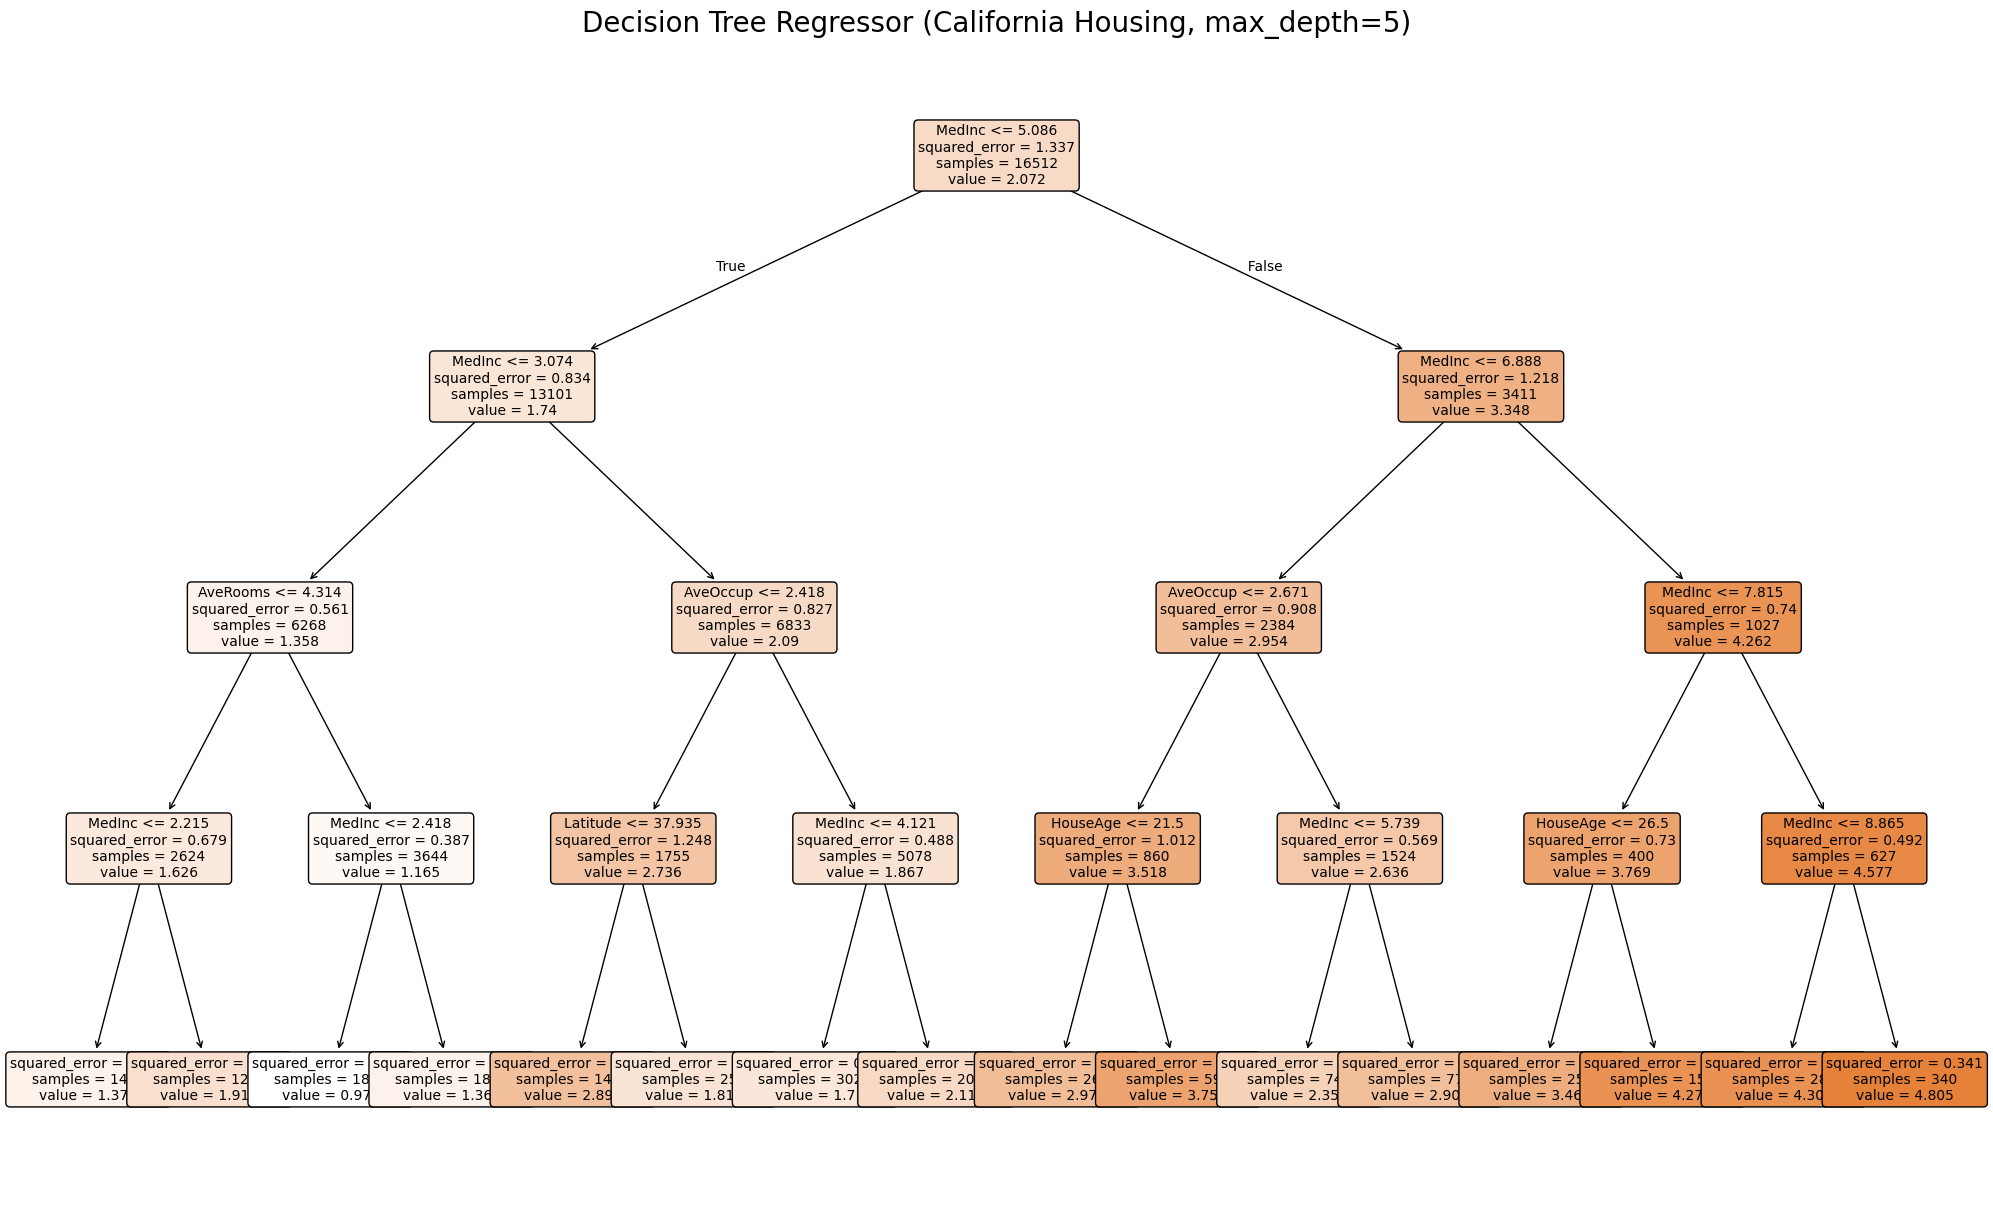

In [19]:
print("\nDrawing decision tree (max_depth=5)...")

plt.figure(figsize=(25, 15))
plot_tree(
    model_pruned,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Regressor (California Housing, max_depth=5)", fontsize=20)
plt.show()


--- Feature importance ---
      Feature  Importance
0      MedInc    0.833422
5    AveOccup    0.108674
2    AveRooms    0.024919
6    Latitude    0.019672
1    HouseAge    0.013313
3   AveBedrms    0.000000
4  Population    0.000000
7   Longitude    0.000000


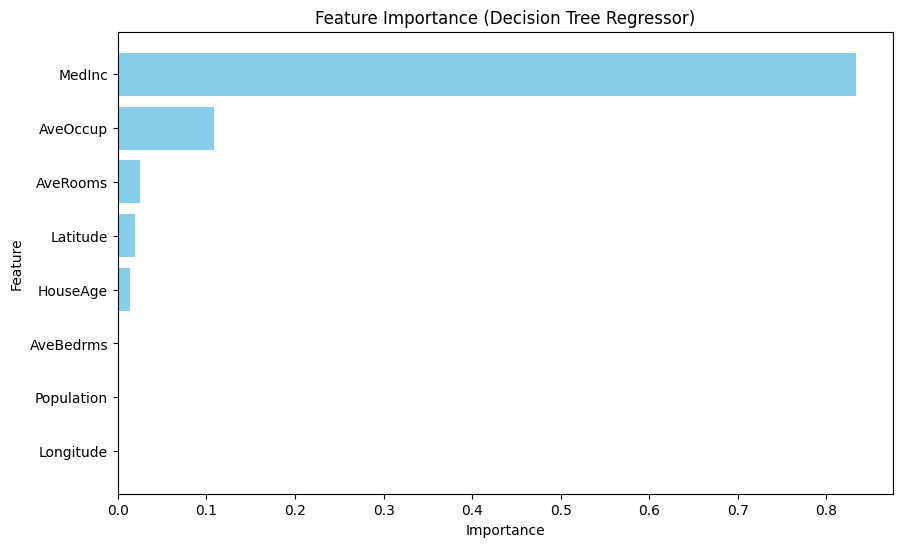

In [20]:

importances = model_pruned.feature_importances_

df_importances = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances},
    columns=['Feature', 'Importance']
)

df_importances = df_importances.sort_values(by='Importance', ascending=False)

print("\n--- Feature importance ---")
print(df_importances)

plt.figure(figsize=(10, 6))
plt.barh(df_importances['Feature'], df_importances['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Decision Tree Regressor)")
plt.gca().invert_yaxis()
plt.show()